In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv('Pokemon.csv')
train_data , test_data = train_test_split(
    data,
    test_size=0.25,  # 25% for testing
    random_state=42  # Set a seed for reproducibility
)
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


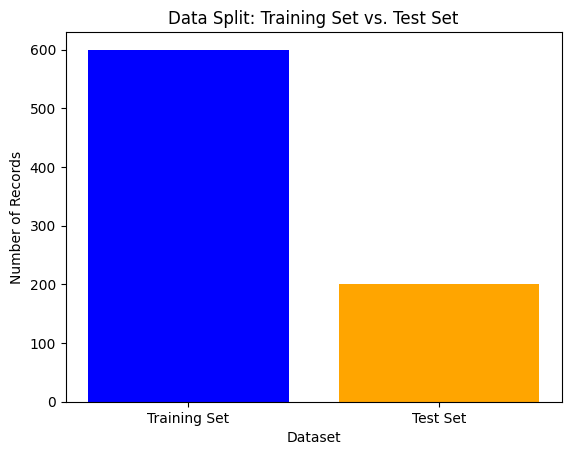

In [18]:
import matplotlib.pyplot as plt
import numpy as np
total_records = len(data)
train_size = len(train_data)
test_size = len(test_data)
labels = ['Training Set', 'Test Set']
sizes = [train_size, test_size]
colors = ['blue', 'orange']
plt.bar(labels, sizes, color=colors)
plt.title('Data Split: Training Set vs. Test Set')
plt.xlabel('Dataset')
plt.ylabel('Number of Records')
plt.show()

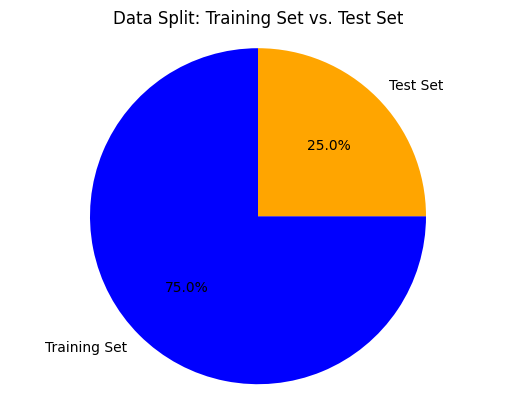

In [19]:
total_records = len(data)
train_size = len(train_data)
test_size = len(test_data)
labels = ['Training Set', 'Test Set']
sizes = [train_size, test_size]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Data Split: Training Set vs. Test Set')
plt.axis('equal')
plt.show()


In [20]:
import numpy as np
from scipy import stats

# Assuming 'data' is your dataset and 'target' is your target variable
# Assuming you have already split your data into 'y_train' and 'y_test'

# # Generate example data
# np.random.seed(42)
# y_train = np.random.normal(loc=50, scale=10, size=750)
# y_test = np.random.normal(loc=55, scale=10, size=250)

# Perform two-sample Z-test
z_stat, p_value = stats.ztest(train_data, test_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


AttributeError: module 'scipy.stats' has no attribute 'ztest'

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats

# Load the Pokémon dataset
data = pd.read_csv('Pokemon.csv')

# Split the dataset into training and test sets
train_data, test_data = train_test_split(
    data,
    test_size=0.25,  # 25% for testing
    random_state=42  # Set a seed for reproducibility
)

# Extract the relevant variables (assuming 'HP' is the variable of interest)
y_train = train_data['HP']
y_test = test_data['HP']

# Perform two-sample Z-test
z_stat, p_value = stats.ztest(y_train, y_test)

# Set the significance level
alpha = 0.05

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


AttributeError: module 'scipy.stats' has no attribute 'ztest'

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

y_train = train_data['HP']
y_test = test_data['HP']
t_stat, p_value = ttest_ind(y_train, y_test)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


T-statistic: 0.4850035223757518
P-value: 0.6278069557806658
Fail to reject the null hypothesis: There is no significant difference between the means.


In [10]:
total_records = len(data)
train_size = len(train_data)
test_size = len(test_data)
print(f"Total Number of Dataset Records-{total_records}")
print(f"Dataset that is to be trained-{train_size}")
print(f"Test Dataset size-{test_size}")

Total Number of Dataset Records-800
Dataset that is to be trained-600
Test Dataset size-200


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

y_train = train_data['Total']
y_test = test_data['Total']
t_stat, p_value = ttest_ind(y_train, y_test)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


T-statistic: -0.9163675561763366
P-value: 0.35975098555553886
Fail to reject the null hypothesis: There is no significant difference between the means.


In [22]:
from scipy.stats import zscore

# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)

# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)

# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)

# Define significance level
alpha = 0.05

# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test

print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: -1.827295749166434e-15
P-value: 0.9999999999999986
Fail to reject the null hypothesis: There is no significant difference between the means.


In [26]:
from scipy.stats import zscore

y_train = train_data['Attack']
y_test = test_data['Attack']
# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)
# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)
# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)
# Define significance level
alpha = 0.05
# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: -6.694053734570105e-16
P-value: 0.9999999999999994
Fail to reject the null hypothesis: There is no significant difference between the means.


In [25]:
pokemon_data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
from scipy.stats import zscore

y_train = train_data['Defense']
y_test = test_data['Defense']
# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)
# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)
# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)
# Define significance level
alpha = 0.05
# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: -1.121706301468504e-15
P-value: 0.9999999999999991
Fail to reject the null hypothesis: There is no significant difference between the means.


In [28]:
from scipy.stats import zscore

y_train = train_data['Speed']
y_test = test_data['Speed']
# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)
# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)
# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)
# Define significance level
alpha = 0.05
# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: -1.4383169510765494e-15
P-value: 0.9999999999999989
Fail to reject the null hypothesis: There is no significant difference between the means.


In [30]:
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [31]:
from scipy.stats import zscore

y_train = train_data['Sp. Atk']
y_test = test_data['Sp. Atk']
# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)
# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)
# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)
# Define significance level
alpha = 0.05
# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: 4.455164140913211e-15
P-value: 1.0000000000000036
Fail to reject the null hypothesis: There is no significant difference between the means.


In [32]:
from scipy.stats import zscore

y_train = train_data['Sp. Def']
y_test = test_data['Sp. Def']
# Calculate z-scores for each sample
z_train = zscore(y_train)
z_test = zscore(y_test)
# Calculate the mean and standard deviation of the z-scores
mean_z_train = z_train.mean()
mean_z_test = z_test.mean()
std_z_train = z_train.std(ddof=1)  # using Bessel's correction for sample standard deviation
std_z_test = z_test.std(ddof=1)
# Calculate the z-value
z_value = (mean_z_train - mean_z_test) / ((std_z_train**2 / len(y_train) + std_z_test**2 / len(y_test))**0.5)
# Define significance level
alpha = 0.05
# Calculate p-value
from scipy.stats import norm
p_value = norm.cdf(z_value) * 2  # two-tailed test
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-value: 3.0032781619963167e-15
P-value: 1.0000000000000024
Fail to reject the null hypothesis: There is no significant difference between the means.


In [34]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
